In [38]:
#Imports:
import os
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridpsec
from scipy.optimize import curve_fit
from scipy import stats

#DIRECTORIES:
datadir = 'data/'
figdir = 'figures/'
plt.rc('axes', labelsize=25)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels

<ipython-input-39-1cf6c7acc120>:27: RuntimeWarning: invalid value encountered in log10
  lgPA = np.log10(PA)


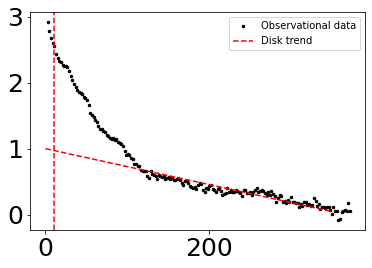

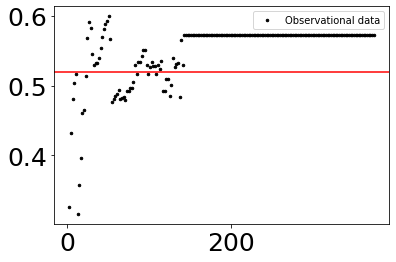

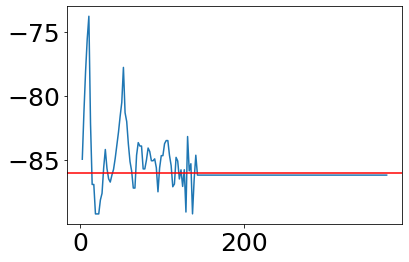

In [39]:
#Importing data:
data = np.loadtxt(datadir+'UGC09067_i.txt',skiprows=3)
r = np.array(data[:,0])
lgr = np.log10(r)

    #Intensity:
I = data[:,1]
lgI = np.log10(I)
plt.figure()
plt.plot(r,lgI,'k.',ms=5,label='Observational data')
plt.plot([0,350],[1,0.05],'r--',label='Disk trend')
plt.axvline(10, color='r', linestyle='--')
plt.xlabel('')
plt.legend()
plt.savefig(figdir+'r_I.png',bbox_inches='tight',dpi=300)

    #Ellipticity:
el = data[:,3]
plt.figure()
plt.plot(r,el,'k.',ms=5,label='Observational data')
plt.axhline(y=0.52, color='r', linestyle='-')
plt.legend()
plt.savefig(figdir+'r_el.png',bbox_inches='tight',dpi=300)
    
    #PA:
PA = data[:,5]
lgPA = np.log10(PA)
#PAo = PA[pos]
#print(PAo)
plt.figure()
plt.plot(r,PA)
#plt.xlim([0,150])
plt.axhline(y=-86, color='r', linestyle='-')
plt.savefig(figdir+'r_pa.png',bbox_inches='tight',dpi=300)

<Figure size 432x288 with 0 Axes>

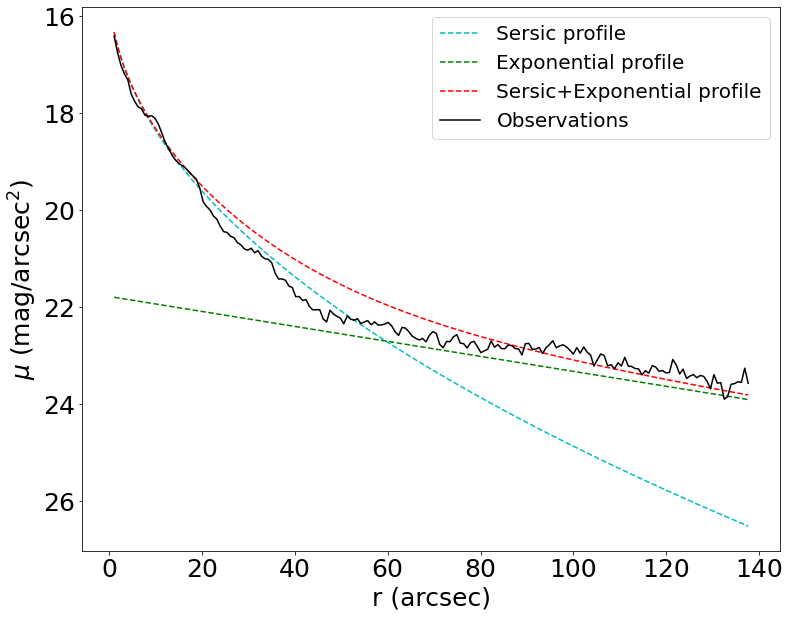

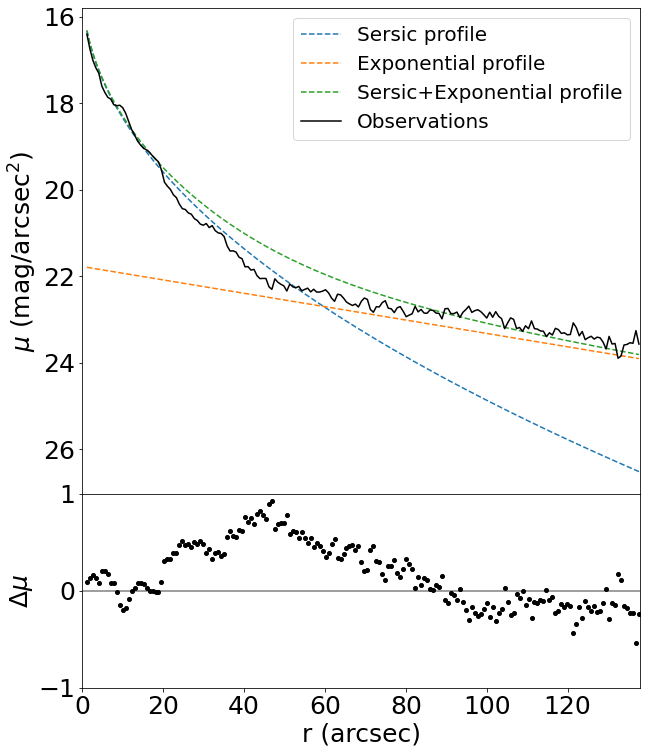

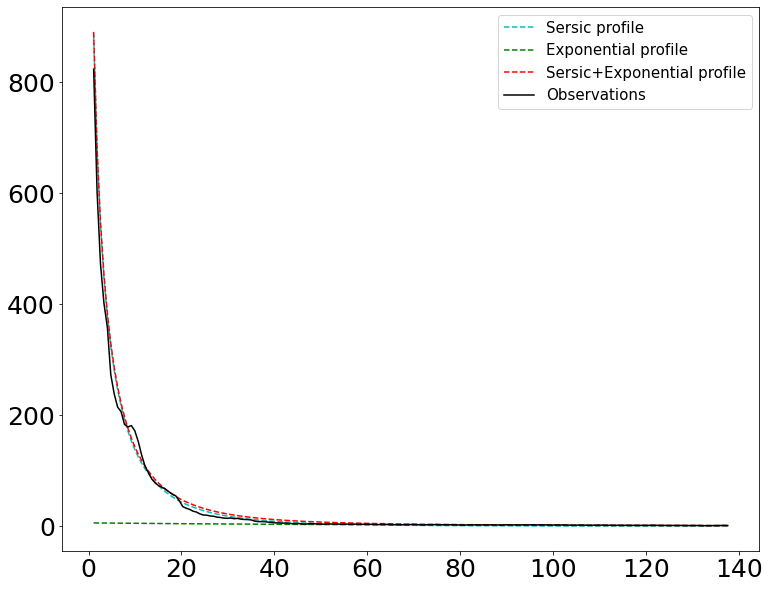

In [77]:
#REPRESENTING PROFILES:
    #Common variables:
zcal = 23.693899
r = np.array(data[:,0]*0.369)

plt.figure()

    #Function defining:
def mu_exp(x,zcal,Io,h):
    i = Io*np.exp(-x/h)
    m = -2.5*np.log10(i)+zcal
    m = np.array(m,dtype='float64')
    return m,i

def mu_sers(x,zcal,Ie,bn,Re,n):
    i = Ie*np.exp(-bn*((x/Re)**(1/n)-1))
    m = -2.5*np.log10(i)+zcal
    m = np.array(m,dtype='float64')
    return m,i

    #Sersic data:
n = 2.00855
bn = 2*n-0.327
Ie = 56.265
Re = 47.3047*0.369
M_sers,I_sers = mu_sers(r,zcal,Ie,bn,Re,n)

    #Exp data:
h = 169.758*0.369
Ie = 100
M_exp,I_exp = mu_exp(r,zcal,Ie,h)

    #Combined:
n = 2.00855
bn = 2*n-0.327
Ie = 56.265
Re = 47.3048*0.369
M_sers_c,I_sers_c = mu_sers(r,zcal,Ie,bn,Re,n)
Io = 5.85
h = 190.439*0.369
M_exp_c,I_exp_c = mu_exp(r,zcal,Io,h)

I_tot = I_exp_c+I_sers_c
M_tot = -2.5*np.log10(I_tot)+zcal
    
    #Data:
I = np.array(data[:,1])
M = -2.5*np.log10(I)+zcal

    #Residual:
res = (M-M_tot)

    #Plotting magnitude:
plt.figure(figsize=(12.5,10))
plt.plot(r,M_sers_c,'c--',label='Sersic profile')
plt.plot(r,M_exp_c,'g--',label='Exponential profile')
plt.plot(r,M_tot,'r--',label='Sersic+Exponential profile')
plt.plot(r,M,'k-',label='Observations')
plt.gca().invert_yaxis()
plt.xlabel('r (arcsec)',fontsize=25)
plt.ylabel(r'$\mu$'+' (mag/arcsec$^2$)',fontsize=25)
plt.legend(fontsize=20)
plt.savefig(figdir+'mu_exp_sersic.png',bbox_inches='tight',dpi=300)

    #Plotting magnitude with residuals:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(10,12.5),gridspec_kw={'height_ratios': [5, 2]})
fig.subplots_adjust(hspace=0)

ax[0].plot(r,M_sers_c,'--',label='Sersic profile')
ax[0].plot(r,M_exp_c,'--',label='Exponential profile')
ax[0].plot(r,M_tot,'--',label='Sersic+Exponential profile')
ax[0].plot(r,M,'k-',label='Observations')
ax[0].invert_yaxis()
ax[0].set(xlabel='r (arcsec)',ylabel=r'$\mu$'+' (mag/arcsec$^2$)')
ax[0].set_xlim([0,138])
ax[0].legend(fontsize=20)

ax[1].plot(r,res,'k.',ms=8)
ax[1].set(xlabel='r (arcsec)',ylabel=r'$\Delta\mu$')
ax[1].axhline(y=0,color='k',alpha=0.5)
ax[1].set_ylim([-1,1])

plt.savefig(figdir+'mu_exp_sersic_res.png',bbox_inches='tight',dpi=300)

    #Plotting intensity:
plt.figure(figsize=(12.5,10))
plt.plot(r,I_sers_c,'c--',label='Sersic profile')
plt.plot(r,I_exp_c,'g--',label='Exponential profile')
plt.plot(r,I_tot,'r--',label='Sersic+Exponential profile')
plt.plot(r,I,'k-',label='Observations')
plt.legend(fontsize=15)
plt.savefig(figdir+'I_exp_sersic.png',bbox_inches='tight',dpi=300)

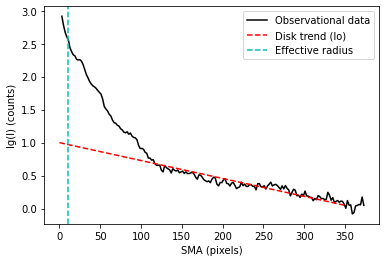

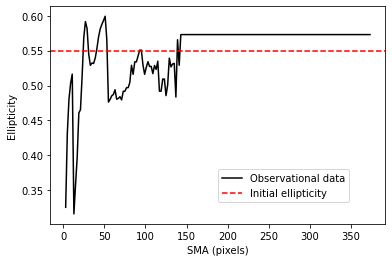

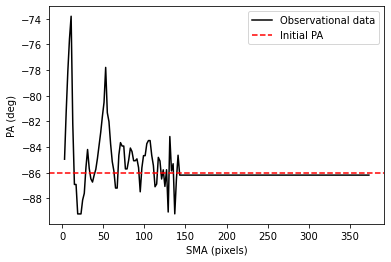

In [35]:
#Importing data:
data = np.loadtxt(datadir+'UGC09067_i.txt',skiprows=3)
r = np.array(data[:,0])

    #Intensity exponential:
I = data[:,1]
lgI = np.log10(I)

plt.figure()
plt.plot(r,lgI,color='k',markersize=5,label='Observational data')
plt.plot([0,350],[1,0.05],color='r',linestyle='--',label='Disk trend (Io)')
plt.axvline(10, color='c', linestyle='--', label='Effective radius')
plt.ylabel('lg(I) (counts)')
plt.xlabel('SMA (pixels)')
plt.legend()
plt.savefig(figdir+'I_par.png',bbox_inches='tight',dpi=300)

    #Ellipticity:
el = data[:,3]

plt.figure()
plt.plot(r,el,'k',ms=5,label='Observational data')
plt.axhline(y=0.55, color='r', linestyle='--', label='Initial ellipticity')
plt.ylabel('Ellipticity')
plt.xlabel('SMA (pixels)')
plt.legend(loc=(0.5,0.1))
plt.savefig(figdir+'el_par.png',bbox_inches='tight',dpi=300)´´´'ñ````````-´´´´´´``````'
    #PA:
PA = data[:,5]
plt.figure()
plt.plot(r,PA,'k',ms=5,label='Observational data')
plt.axhline(y=-86, color='r', linestyle='--', label='Initial PA')
plt.ylabel('PA (deg)')
plt.xlabel('SMA (pixels)')
plt.legend()
plt.savefig(figdir+'PA_par.png',bbox_inches='tight',dpi=300)

In [38]:
120*0.369

44.28

In [86]:
from scipy.constants import c
d = (c*0.0262)/(69.8*10**3)
print(d)

112.5295472722063


In [87]:
8.7386-5*np.log10(112.53*10**6)+5

-26.517741594351925